
import matplotlib.pyplot as plt
import numpy as np
import cv2

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
%matplotlib inline

Array([[[250, 251, 255],
        [250, 251, 255],
        [250, 251, 255],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[250, 251, 255],
        [250, 251, 255],
        [250, 251, 255],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[250, 251, 255],
        [250, 251, 255],
        [250, 251, 255],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       ...,

       [[254, 227, 208],
        [254, 227, 208],
        [254, 227, 208],
        ...,
        [245, 217, 206],
        [245, 217, 206],
        [245, 217, 206]],

       [[254, 227, 208],
        [254, 227, 208],
        [254, 227, 208],
        ...,
        [245, 217, 206],
        [245, 217, 206],
        [244, 216, 205]],

       [[254, 227, 208],
        [254, 227, 208],
        [254, 227, 208],
        ...,
        [244, 216, 205],
        [244, 216, 205],
        [243, 215, 204]]

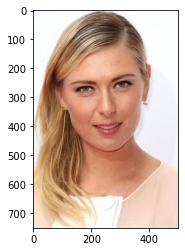

In [7]:
import matplotlib.pyplot as plt
import imageio
import cv2
img = imageio.imread('C:\\Users\\hp\\Downloads\\maria sharapova - Google Search\\Maria Sharapova — The Movie Database.jpg')
img.shape  # im is a numpy array
(512, 512, 3)
plt.imshow(img)
img

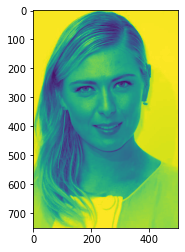

In [8]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [27]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\hp\\Downloads\\face cascade.txt")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\hp\\Downloads\\eye cascade.txt")
# Detect faces in the image
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)
faces

array([[ 87, 140, 324, 324]])

In [28]:
(x,y,w,h)=faces[0]
x,y,w,h

(87, 140, 324, 324)

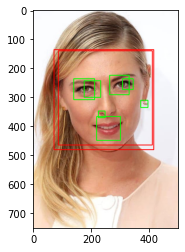

In [29]:
face_img=cv2.rectangle(img,(x,y),((x+w),(y+h)),(255,0,0),2)
plt.imshow(face_img)

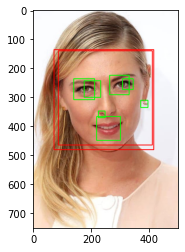

In [30]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
     face_img=cv2.rectangle(img,(x,y),((x+w),(y+h)),(255,0,0),2)
     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
     roi_gray = gray[y:y+h, x:x+w]
     roi_color = img[y:y+h, x:x+w]
     eyes = eye_cascade.detectMultiScale(roi_gray)
     for (ex,ey,ew,eh) in eyes:
         cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
cv2.destroyAllWindows()

In [31]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    roi=[] 
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            roi.append(roi_color)
    return roi

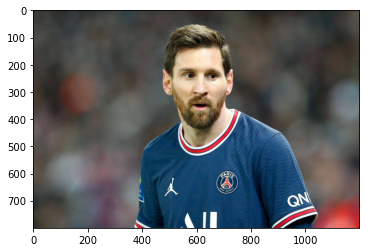

In [32]:
x="C:\\Users\\hp\\Downloads\\lionel messi - Google Search\\Bicycle Kick Goal.jpg"
original_image=imageio.imread(x)
plt.imshow(original_image)

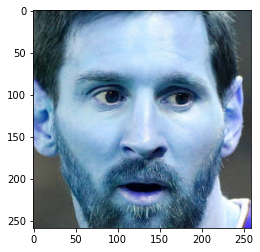

In [33]:
cropped_image=get_cropped_image_if_2_eyes(x)
for i in range(len(cropped_image)):
    plt.imshow(cropped_image[i])

In [34]:
path_to_data='C:\\Users\\hp\\Downloads\\dataset images'
path_to_cr_data='C:\\Users\\hp\\Downloads\\dataset images'

In [35]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
   if entry.is_dir():
        img_dirs.append(entry.path)

In [36]:
img_dirs

['C:\\Users\\hp\\Downloads\\dataset images\\lionel messi - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\maria sharapova - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\roger federer - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\serena willkiams - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\virat kohli - Google Search']

In [37]:
 # creating a cropped folder to store cropped face images
import shutil
 #  if folder "cropped" exists remove it
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
# # create folder
 os.mkdir(path_to_cr_data)

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
#          print(entry)
         roi_color = get_cropped_image_if_2_eyes(entry.path)
         if len(roi_color)!=0:
             for i in range(len(roi_color)):
                    cropped_folder = path_to_cr_data + celebrity_name
                    if not os.path.exists(cropped_folder):
                        os.makedirs(cropped_folder)
                        cropped_image_dirs.append(cropped_folder)
                        print("Generating cropped images in folder: ",cropped_folder)
                    cropped_file_name = celebrity_name + str(count) + ".png"
                
                    cropped_file_path = cropped_folder + "/" + cropped_file_name
                    cv2.imwrite(cropped_file_path, roi_color[i])
                    celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                    count +=1

lionel messi - Google Search
Generating cropped images in folder:  C:\Users\hp\Downloads\dataset imageslionel messi - Google Search
maria sharapova - Google Search
Generating cropped images in folder:  C:\Users\hp\Downloads\dataset imagesmaria sharapova - Google Search
roger federer - Google Search
Generating cropped images in folder:  C:\Users\hp\Downloads\dataset imagesroger federer - Google Search
serena willkiams - Google Search
Generating cropped images in folder:  C:\Users\hp\Downloads\dataset imagesserena willkiams - Google Search
virat kohli - Google Search
Generating cropped images in folder:  C:\Users\hp\Downloads\dataset imagesvirat kohli - Google Search


In [40]:
img_dirs

['C:\\Users\\hp\\Downloads\\dataset images\\lionel messi - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\maria sharapova - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\roger federer - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\serena willkiams - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\virat kohli - Google Search']

In [41]:
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('\\')[-1]
    print(celebrity_name)
    
    

lionel messi - Google Search
maria sharapova - Google Search
roger federer - Google Search
serena willkiams - Google Search
virat kohli - Google Search


In [42]:
img_dirs

['C:\\Users\\hp\\Downloads\\dataset images\\lionel messi - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\maria sharapova - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\roger federer - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\serena willkiams - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\virat kohli - Google Search']

In [43]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    #Data-type conversion
    #convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #computeCoefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    #process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

In [44]:
celebrity_file_names_dict2={}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('\\')
    print(celebrity_name[-1])
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict2[celebrity_name[-1]] = file_list
#celebrity_file_names_dict2im_har=w2d(cropped_image,'db1',5)


lionel messi - Google Search
maria sharapova - Google Search
roger federer - Google Search
serena willkiams - Google Search
virat kohli - Google Search


In [45]:
celebrity_file_names_dict3={
    "virat kohli":"cricket",
    "maria sharapova":"tennis",
    "lionel messi":"football",
    "salina wiliams":"tennis",
    "reger federer":"tennis"
         
}

In [46]:
class_dict2 = {}
count = 0
for celebrity_name in celebrity_file_names_dict2.keys():
    class_dict2[celebrity_name] = count
    count = count + 1
class_dict2

{'lionel messi - Google Search': 0,
 'maria sharapova - Google Search': 1,
 'roger federer - Google Search': 2,
 'serena willkiams - Google Search': 3,
 'virat kohli - Google Search': 4}

In [47]:
inv_dict2 = dict(zip(class_dict2.values(), class_dict2.keys())) 
inv_dict2

{0: 'lionel messi - Google Search',
 1: 'maria sharapova - Google Search',
 2: 'roger federer - Google Search',
 3: 'serena willkiams - Google Search',
 4: 'virat kohli - Google Search'}

In [48]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict2.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict2[celebrity_name])

C:\Users\hp\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [49]:
celebrity_file_names_dict2={}
for img_dir in img_dirs:
    print(img_dir)
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict2[celebrity_name] = file_list
    #celebrity_file_names_dict2im_har=w2d(cropped_image,'db1',5)


C:\Users\hp\Downloads\dataset images\lionel messi - Google Search
lionel messi - Google Search
C:\Users\hp\Downloads\dataset images\maria sharapova - Google Search
maria sharapova - Google Search
C:\Users\hp\Downloads\dataset images\roger federer - Google Search
roger federer - Google Search
C:\Users\hp\Downloads\dataset images\serena willkiams - Google Search
serena willkiams - Google Search
C:\Users\hp\Downloads\dataset images\virat kohli - Google Search
virat kohli - Google Search


In [50]:
img_dirs

['C:\\Users\\hp\\Downloads\\dataset images\\lionel messi - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\maria sharapova - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\roger federer - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\serena willkiams - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset images\\virat kohli - Google Search']

plt.imshow(cropped_image[i])

In [51]:
cropped_image_dirs

['C:\\Users\\hp\\Downloads\\dataset imageslionel messi - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset imagesmaria sharapova - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset imagesroger federer - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset imagesserena willkiams - Google Search',
 'C:\\Users\\hp\\Downloads\\dataset imagesvirat kohli - Google Search']

In [52]:
celebrity_file_names_dict2={}
for img_dir in img_dirs:
    print(img_dir)
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict2[celebrity_name] = file_list
# celebrity_file_names_dict2im_har=w2d(cropped_image,'db1',5)

C:\Users\hp\Downloads\dataset images\lionel messi - Google Search
lionel messi - Google Search
C:\Users\hp\Downloads\dataset images\maria sharapova - Google Search
maria sharapova - Google Search
C:\Users\hp\Downloads\dataset images\roger federer - Google Search
roger federer - Google Search
C:\Users\hp\Downloads\dataset images\serena willkiams - Google Search
serena willkiams - Google Search
C:\Users\hp\Downloads\dataset images\virat kohli - Google Search
virat kohli - Google Search


In [53]:
len(X[0])

4096

In [54]:
X=np.array(X).reshape(len(X),4096).astype(float)

In [55]:
X.shape

(630, 4096)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6,random_state=3)
pipe=Pipeline([('scalar',StandardScaler()),('svc',SVC(kernel='rbf',C=20))])
pipe.fit(X_train,y_train)

               

Pipeline(steps=[('scalar', StandardScaler()), ('svc', SVC(C=20))])

In [60]:
pipe.score(X_test,y_test)

0.5502645502645502

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       114
           1       0.46      0.24      0.32        54
           2       0.52      0.20      0.29        60
           3       0.53      0.86      0.66       102
           4       0.47      0.17      0.25        48

    accuracy                           0.55       378
   macro avg       0.52      0.45      0.44       378
weighted avg       0.53      0.55      0.50       378



In [69]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model_params={
    'svm':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20],
            'kernel':['linear','rbf']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10]
        }
    },'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'C':[1,5,10]
        }
    }
}
model_params

{'svm': {'model': SVC(gamma='auto'),
  'params': {'C': [1, 10, 20], 'kernel': ['linear', 'rbf']}},
 'random_forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [1, 5, 10]}},
 'logistic_regression': {'model': LogisticRegression(solver='liblinear'),
  'params': {'C': [1, 5, 10]}}}

In [71]:
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [72]:
import pandas as pd
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.376190,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.388889,{'n_estimators': 10}
2,logistic_regression,0.357143,{'C': 1}
